In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from grn_tpm import text_bn_graph, iit_tpm_cal

In [65]:
colors = ["#BB4F4F", '#2A69B3', '#74B38F', '#FFA500', "#0000FF", "#0000E0", "#1E90FF", "#87CEEB"]

def decimal_to_binary(decimal, min_length=1):
    if min_length == 0:
        return ''
    if decimal == 0:
        return "0" if min_length == 1 else "0".zfill(min_length)
    binary = ""
    while decimal > 0:
        binary = str(decimal % 2) + binary
        decimal = decimal // 2
    # 使用 zfill 确保二进制字符串至少有 min_length 长度
    return binary.zfill(min_length)

def tpm_series2(tpm, init_state, steps):
    init_num = int(init_state, 2)
    serie = [init_num]
    serie_str = [init_state]
    for t in range(steps):
        num = serie[t]
        probabilities = tpm[num, :]
        sample = np.random.choice(range(len(probabilities)), p=probabilities)
        serie.append(sample)
        serie_str.append(decimal_to_binary(sample, min_length=int(np.log2(len(probabilities)))))
    return serie, serie_str

def serie_plot2(tpm, mech_size, en_size, en_series, init='111', leg=False, figure_show=True, color="#BB4F4F"):
    un_sys, un_en, syn, tpm_dic = iit_tpm_cal(tpm, mech_size=mech_size, en_size=en_size, dis=True)   
    strs = [decimal_to_binary(i, min_length=mech_size) for i in range(2**mech_size)] 

    long_serie = []
    init_state = init
    for en_list in en_series:
        en_state = en_list[0]
        steps = len(en_list)
        serie, serie_str = tpm_series2(tpm_dic[en_state], init_state, steps)
        init_state = serie_str[-1]
        long_serie += serie[:-1]
        
    if figure_show:
        fig, ax = plt.subplots(figsize=(10,4), dpi=150)

            #ax.scatter(range(len(long_serie)), np.ones(len(long_serie))*indx, color='#2A69B3', alpha=1/8, s=100)
        ax.scatter(range(len(long_serie)), long_serie, label='init_state:'+init, color=color, s=100)
        ax.set_xlabel('Time')
        ax.set_ylabel('System state')
        # 设置y轴的标签
        ax.set_yticks(range(8))
        ax.set_yticklabels(strs)
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        if leg:
            plt.legend(by_label.values(), by_label.keys(), loc=[1.01, 0])
        #plt.title(name + '_syn=' + str(round(syn,4)))
        # 显示图形
        plt.show()
        
    return un_sys, un_en, syn, long_serie

def generate_random_sequence(n, length):
    result = []
    while len(result) < length:
        num = random.randint(0, n)
        if num not in result:
            result.append(num)
    return result

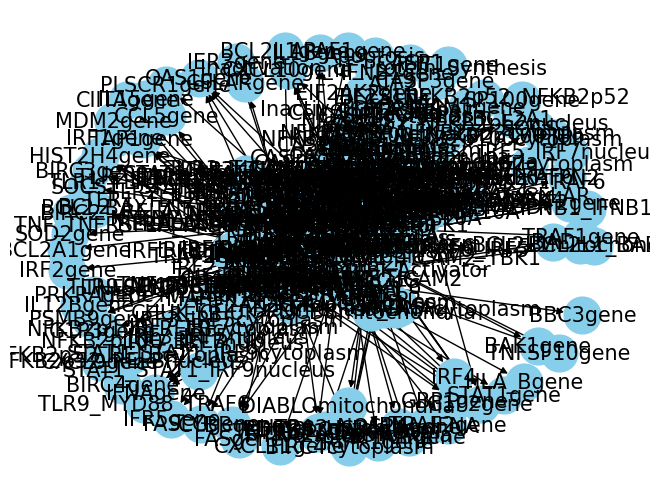

all intrinsic variables: TBK1,IL1R1,APAF1gene,ILIB_IL1R1_MYD88_IRAK1_IRAK4,TNFRSF10B,RELAp65_NFKB1p50cytoplasm,BAX,BCL2_BAX,TNF_BAG4_TNFRSF1A,EP300,STAT1gene,PARP,BCL3_NFKB2p52_NFKB2p52,TLR9_TLR9,IRF3_IRF3cytoplasm,ISGF3cytoplasm,LMNA,TNFSF10_TNFRSF10A,GAS2,IFNGR1,IRF1gene,TNF_TNFRSF1B,STAT1_STAT1_IRF9cytoplasm,TICAM1,BIRC4gene,cLMNA,TOLLIP,TNFSF10gene,STAT1_STAT1_IRF9nucleus,FASLGgene,TLR1_TLR2_TIRAP_MYD88_IRAK2_IRAK1_IRAK4_TRAF6,IRF5_IRF7nucleus,Apoptosis,HLA_Bgene,RELAp65_NFBK1p50nucleus,TLR3,IRAK1,BID,IRF7_IRF7cytoplasm,BCL2A1gene,TNFSF13B_TNFRSF17_TRAF5,PSMB9gene,IFNGR2,CXCL10gene,IRF5,TLR5,PDCD8_HSPA1A,Cell_Shrinkage,CHUK_CHUK,JAK2,CBP,CKII,DIABLOcytoplasm,IRF5_IRF5nucleus,IRF7,CCL5gene,MYD88,BAG4,CYBBgene,ILIB_IL1R1_MYD88_IRAK1_IRAK4_TRAF6,EIF2AK2_PRKRA,STAT1,IFNA_IFNA,BAK1gene,ISGF3nucleus,TLR4_TICAM1_TICAM2,SP100gene,RELA_p65,TNFSF10_TNFSF10B_FADD,IPARP,TLR5_MYD88_IRAK1_IRAK4_TRAF6,IFNB1_IFNB1,IRF3_IRF7nucleus,IRF1cytoplasm,PTP,TRAF2gene,NFKB1_p50,IRAK4,BIRC3gene,CASP9,Inactiv

In [46]:

un, un_en, syn, tpm1, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Signaling in Macrophage Activation_18433497.txt', candidate_sys=[57, 105, 8], fill_onenode=True, noise=0, save_onenote = False)

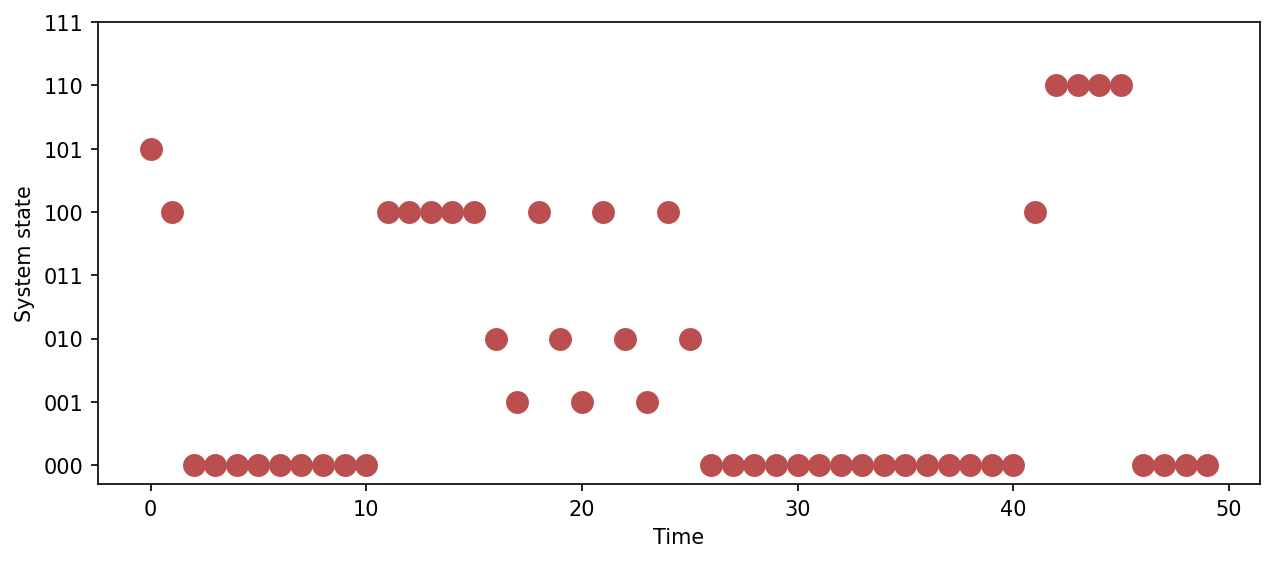

In [63]:
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 5
e_len = 3
en_ls0 = generate_random_sequence(2**e_len-1, 10)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
#en_series = [[decimal_to_binary(3, min_length=e_len) for _ in range(n)], [decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm1, mech_size=3, en_size=e_len, en_series=en_series, init='101', leg=False, figure_show=True, color="#BB4F4F")

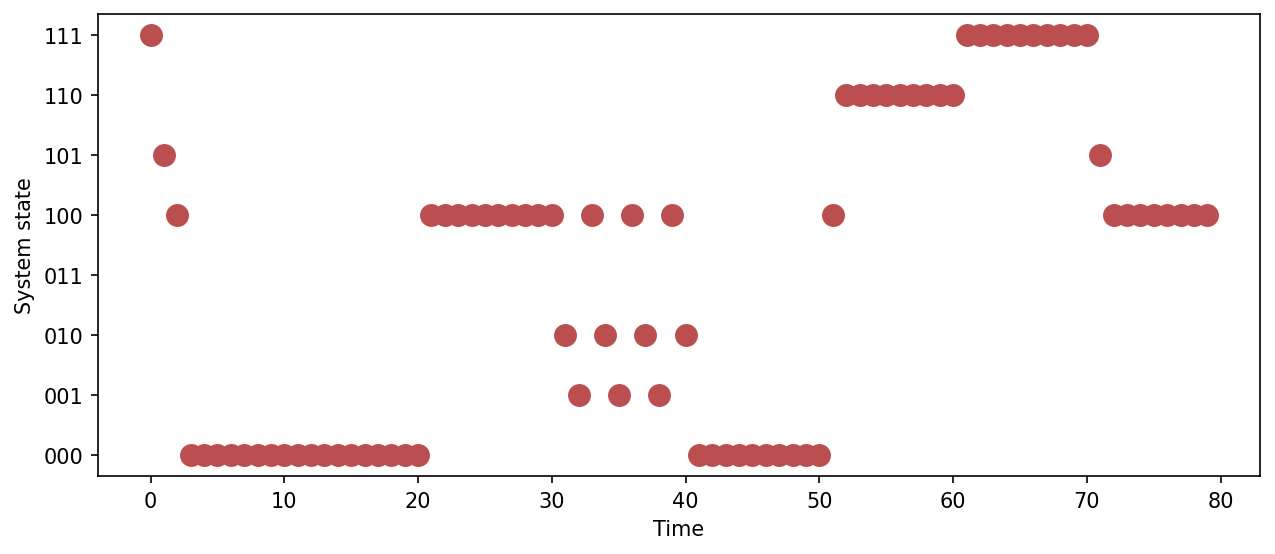

In [69]:
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 10
e_len = 3
en_ls0 = generate_random_sequence(2**e_len-1, 8)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]
#en_series = [[decimal_to_binary(3, min_length=e_len) for _ in range(n)], [decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm1, mech_size=3, en_size=e_len, en_series=en_series, init='111', leg=False, figure_show=True, color="#BB4F4F")

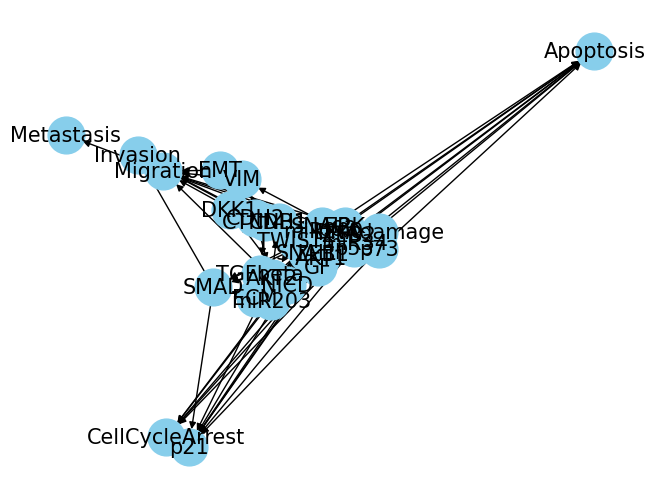

all intrinsic variables: EMT,p21,p53,p63,NICD,Invasion,AKT2,AKT1,miR200,miR34,Metastasis,SNAI1,VIM,ZEB2,ZEB1,TGFbeta,CDH2,DKK1,TWIST1,ERK,SMAD,CellCycleArrest,miR203,Apoptosis,SNAI2,GF,CDH1,Migration,p73,CTNNB1
external parameters:ECM,DNAdamage
mechanism:    CDH1,CDH2,GF
tpm: 
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
environment:    CDH1,CDH2,GF,AKT2,SNAI1,ZEB2,ZEB1,TWIST1,SNAI2
un_en:  1.1003111621563575
un:  0.9544340029249649
syn:  -8.881784197001252e-16
------------------------------------------------------------------------------------------------------------------------


In [71]:
#un, un_en, syn, tpm2, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Tumour Cell Invasion and Migration_26528548.txt', candidate_sys=[7,27,12], fill_onenode=True, noise=0, save_onenote = False)
un, un_en, syn, tpm2, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Tumour Cell Invasion and Migration_26528548.txt', candidate_sys=[26,16,25], fill_onenode=True, noise=0, save_onenote = False)

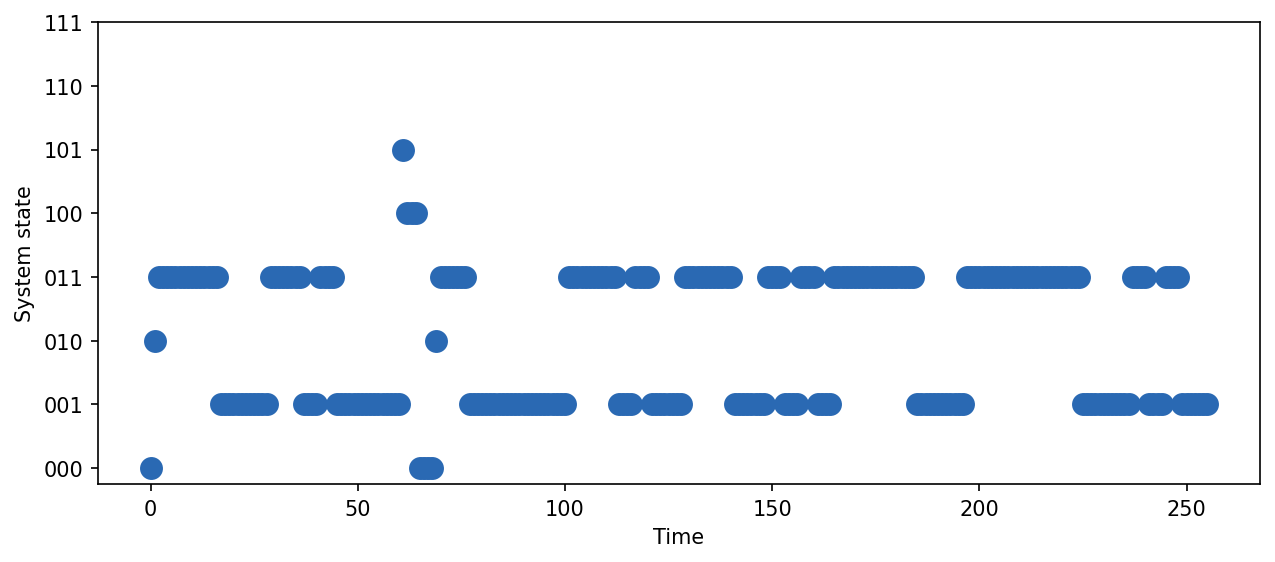

[14, 3, 35, 31, 28, 17, 13, 11, 54, 4, 27, 29, 25, 53, 57, 0, 20, 43, 19, 48, 12, 45, 44, 33, 5, 58, 15, 10, 37, 46, 24, 8, 47, 26, 34, 9, 21, 59, 41, 7, 40, 51, 63, 50, 18, 6, 49, 32, 1, 55, 22, 38, 62, 2, 39, 30, 16, 60, 56, 42, 52, 23, 61, 36]


In [73]:
import random
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 4
e_len = 6

en_ls0 = generate_random_sequence(2**e_len-1, 64)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]#[decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm2, mech_size=3, en_size=e_len, en_series=en_series, init='000', leg=False, figure_show=True, color='#2A69B3')
print(en_ls0)

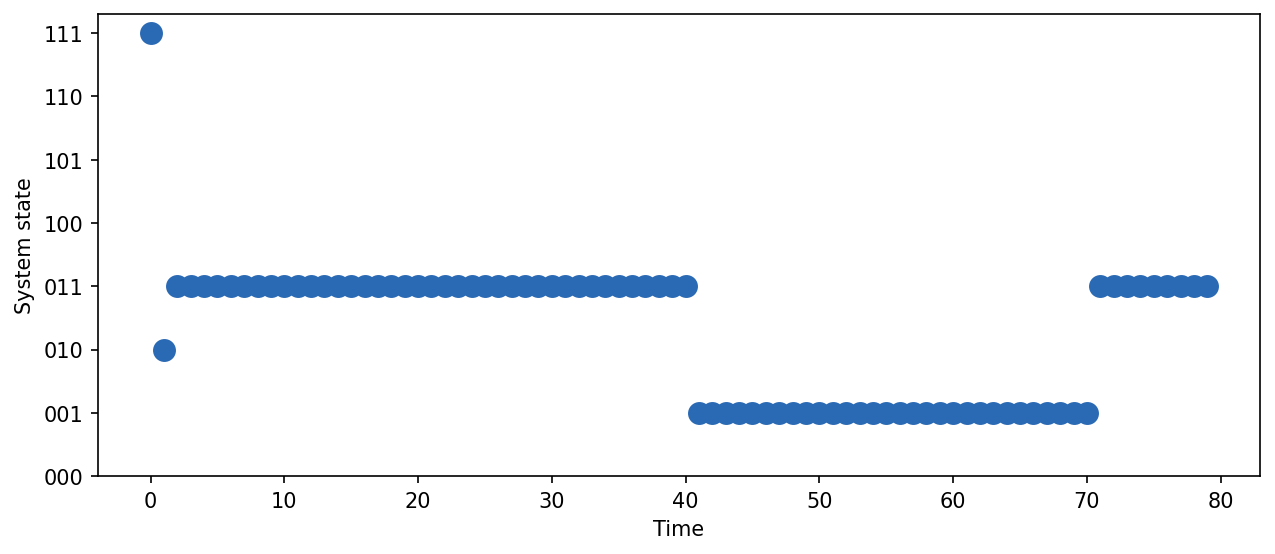

[14, 3, 35, 31, 28, 17, 13, 11]


In [75]:
seed = 42
np.random.seed(seed)
random.seed(seed)
n = 10
e_len = 6

en_ls0 = generate_random_sequence(2**e_len-1, 8)
en_series = [[decimal_to_binary(k, min_length=e_len) for _ in range(n)] for k in en_ls0]#[decimal_to_binary(11, min_length=e_len) for _ in range(n)], [decimal_to_binary(35, min_length=e_len) for _ in range(n)]]
un_sys, un_en, syn, series_ls = serie_plot2(tpm2, mech_size=3, en_size=e_len, en_series=en_series, init='111', leg=False, figure_show=True, color='#2A69B3')
print(en_ls0)

# Noise experiment

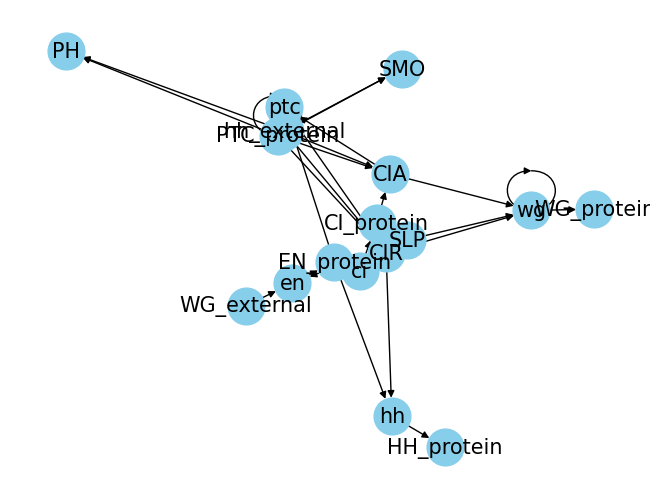

all intrinsic variables: HH_protein,EN_protein,WG_protein,CIR,PTC_protein,ci,en,PH,wg,ptc,hh,SMO,CI_protein,CIA
external parameters:WG_external,SLP,hh_external
mechanism:    CIR,EN_protein,hh
tpm: 
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
environment:    CIR,EN_protein,hh,PTC_protein,CI_protein,hh_external,en
un_en:  1.5435644431995965
un:  0.8112781244591328
syn:  -2.220446049250313e-16
------------------------------------------------------------------------------------------------------------------------


In [85]:
un, un_en, syn, tpm2, _, _, _, _ = text_bn_graph(folder = 'cellcollective/', textfile = 'Body Segmentation in Drosophila 2013_23520449.txt', candidate_sys=[3,1,10], fill_onenode=True, noise=0, save_onenote = False)